<a href="https://colab.research.google.com/github/Marcehlin/Trabalho-ProgEstat/blob/main/Trabalho_Prog_Estat_Tema_Galton_Grupo_Lara_e_Marcelo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descrição do trabalho:
**(copiado do arquivo "projetos.pdf", apagar antes de entregar)**

##1: Formato e critérios de avaliação
Cada projeto deve ser entregue em um único notebook R ou Python, com texto explicativo em formato relatório com código. Use semente fixa. O código usado deve ser colocado no github de forma organizada e clara. Reprodutibilidade é parte da nota. 2 dos grupos serão sorteados para apresentar os projetos e responder perguntas sobre o conteúdo e o código no dia 25/11.

Entrega sugerida

* Introdução breve com objetivo claro e perguntas.

* Descrição do modelo gerador dos dados.

* Metodologia de simulação, incluindo algoritmos.

* Experimentos com plano e métricas.

* Resultados com gráficos legíveis e tabelas simples, juntamente com suas interpretações.


**Problema dos sobrenomes de Galton**

**Introdução**

O problema da extinção de sobrenomes, popularizado por Francis Galton e Henry
William Watson no século XIX, é um dos exemplos canônicos de processos estocásticos de ramificação. O objetivo deste projeto é simular a evolução de uma linhagem (representada por um sobrenome) ao longo de gerações para estimar a probabilidade de sua extinção e o tempo esperado até que isso ocorra. As questões centrais são: Sob quais condições um sobrenome está destinado a desaparecer? Como a distribuição do número de descendentes de um indivíduo afeta essa probabilidade? Qual é a distribuição do tempo até a extinção
nos casos em que ela ocorre?

**Modelo Gerador**

O sistema é modelado como um processo de ramificação de Galton-Watson.
Começamos com uma única partícula (o ancestral) na geração $G_0$.

O número de descendentes (filhos) de cada partícula na geração $G_i$ pe uma variável aleatória independente e identicamente distribuída (i.i.d.) com uma distribuição de prole D.

Seja $Z_k$ o número de partículas na geração $G_k$. Então, $Z_{k+1}$ = $\sum_{j=1}^{Z_k} X_j$, onde cada $X_j ∼ D$ é o número de filhos do j-ésimo indivíduo da geração k. A linhagem se extingue se, para algum k, $Z_k = 0$.

Neste projeto, você deverá explorar diferentes distribuições para a prole D:
* Poisson($λ$): Um modelo clássico, onde o número médio de filhos é $λ$.
* Binomial(n, p): Representa um número máximo de filhos n, cada um com probabilidade p de ocorrer.

**Metodologia de Simulação**

A simulação de uma única trajetória do processo é feita iterativamente:
1. Inicie com $Z_0 = 1$ na geração $k = 0$.
2. Para cada geração k, enquanto Zk > 0:
* Gere $Z_k$ números aleatórios da distribuição de prole D.
* Calcule a nova população $Z_k+1$ como a soma desses números.
* Incremente k.
3. Se $Z_k = 0$, a linhagem se extinguiu na geração k. Registre o tempo de extinção. Se a população crescer além de um limiar muito grande (por exemplo: $10^6$), a trajetória pode ser considerada como não extinta e truncada.
A probabilidade de extinção é estimada pela frequência de trajetórias que se extinguiram em um grande número de simulações.

Plano de Experimentos e Métricas
O comportamento do processo depende crucialmente do número médio de descendentes, m = E[X]. Os experimentos devem investigar os três regimes:

* Subcrítico (m < 1): A extinção é garantida. Use uma distribuição com média menor que 1 (e.g., Poisson(0.8)).

* Crítico (m = 1): A extinção também é garantida, mas o processo pode demorar mais. Use Poisson(1).

* Supercrítico (m > 1): Há uma probabilidade positiva de sobrevivência eterna.
Use Poisson(1.2) e Poisson(2.0).

Para cada regime:
* Realize M = 10000 simulações.
* Métricas:
(a) Frequência de extinção (para estimar a probabilidade).
(b) Para as linhagens extintas, colete o tempo até a extinção.

Passos para fazer o trabalho: (**Apagar depois**)

*  Introdução e Formulação das Perguntas (a gente tem que entender o problema planejar o que fazer)
* Explicação de Fundamentos Teóricos
* Criar um modelo gerador (funções / códigos em R)
* Metodologia (explicar o que o modelo faz, o que cada linha de código está fazendo)
* Experimentos / Simulações, e Métricas (a escala de dados, o que os números significam)
* Interpretação de Resultados
* Visualização (gráficos e tabelas)
* Conclusão / preparar a apresentação

* e depois Fazer upload no github e entregar

# Introdução

link do github:
https://github.com/Marcehlin/Trabalho-ProgEstat

Este trabalho tem como objetivo simular o problema da extinção dos sobrenomes, analisando-o por meio de diferentes distribuições de probabilidade, sendo elas a Binonmial e a Poisson **SE FORMOS USAR OUTRAS COLOCAR AQUI**. Utilizando de experimentos computacionais, este estudo procura analisar a sobrevivência de linhagens ao decorrer do tempo, para, por fim, resolver algumas questões centrais do problema em questão: **PERGUNTAS AQUI**
1. Sob quais condições um sobrenome está destinado a desaparecer?
2. Como a distribuição do número de descendentes afeta a probabilidade de extinção?
3. Qual é a distribuição do tempo até extinção nos diferentes regimes?

# Descrição do modelo

Processo de Galton-Watson:
1. $Z_0 = 1$ (ancestral inicial)
2. Para cada geração k, enquanto $Z_k > 0$ e $Z_k < 10^6$:
* $Z_{k+1}$ = $\sum_{j=1}^{Z_k} X_j$, onde $X_j ∼ D$ é a distribuição da prole, e $X_j$ são i.i.d.
* $D ∼ Poisson(λ)$ ou $Binomial(n, p)$ ou uma distribuição discreta
* k = k + 1
3. Se $Z_k = 0$, a linhagem se extinguiu na geração k. Registre o tempo de extinção. Se $Z_k > 10^6$ consideramos que a trajetória não extinta e truncada.
A probabilidade de extinção é estimada pela frequência de trajetórias que se extinguiram em um grande número de simulações.

# Metodologia

**Função principal do processo de ramificação**

que simula um único processo de ramificação e retorna uma lista:

In [1]:
processo_de_ramificacao <- function(dist, p1, p2, G_0 = 1,fp = NULL){
  #abaixo é uma variável que armazena os dados que estamos interessados em um processo de ramificação
  #Extinção é booleana, 0 se o processo não extinto, 1 caso contrário
  #Tempo de Extinção: um numero inteiro que armazena o tempo de extinção do processo
  #Total do Processo: um numero inteiro que armazena o total de descendentes do processo
  #Historia: um vetor numerico que armazena a quantidade de filhos de cada geração, ou seja, os Z_i's
  resultado_processo <- list(Extincao = FALSE, Tempo_Extincao = NA, Total_do_Processo = 1, Historia = numeric())

  resultado_processo$Historia[1] <- G_0 # A familia começa com um Acestral
  k <- 1 #indice para iterar o processo

  #em vez de verificar o total, agora se verifica a ultima geração ultrapassa  1e6
  while (resultado_processo$Historia[k] > 0 && resultado_processo$Historia[k] < 1000000){
    if (dist == "poisson"){
      incremento <- rpois(resultado_processo$Historia[k], p1)
    }

    else if (dist == "binomial"){
      incremento <- rbinom(resultado_processo$Historia[k], size = p1, prob = p2)
    }
    else if (dist == "personalizada"){
      incremento <- sum(sample(size = resultado_processo$Historia[k],
                            x = fp$suporte,
                            p = fp$probabilidade,
                            replace = TRUE))
    }
    else
    {
      return(-1)
    }
    resultado_processo$Historia[k+1] <- sum(incremento)
    resultado_processo$Total_do_Processo <- resultado_processo$Total_do_Processo + resultado_processo$Historia[k+1]
    k <- k + 1
  }
  if (resultado_processo$Historia[k] == 0){
    resultado_processo$Extincao <- TRUE
    resultado_processo$Tempo_Extincao <- k - 1
  }
return (resultado_processo) #retornar a lista que tem os dados
}

**Função para múltiplas simulações**

que repete M vezes a função acima, e pega as listas retornadas para junta em um dataframe + uma lista das histórias para montar a trajetória depois

In [2]:
simular <- function(dist, p1, p2, G0, M, fp = NULL) {
    resultados <- list() #criar uma lista vazia para colocar resultado de cada simulação

    for (i in 1:M){
      resultados[[i]] <- processo_de_ramificacao(dist, p1, p2, G_0 = G0, fp)

      #if (i %% 100 == 0) { #só pra ver o progresso
      #  cat("Simulação", i, "de", M, "\n")
      #}
    }

    # extrair apenas as metricas numericas para o dataframe, porque se colocar a historia junto vai ficar pesado
    df <- data.frame(
      Extincao = sapply(resultados, function(x) x$Extincao),
      Tempo_Extincao = sapply(resultados, function(x) x$Tempo_Extincao),
      Total_do_Processo = sapply(resultados, function(x) x$Total_do_Processo)
    )

    # manter as histórias como lista separada
    historias <- lapply(resultados, function(x) x$Historia)

    return (list(df = df,historias = historias)) #retornar uma lista de 2 elementos, primeiro é o dataframe das metricas, segundo é o vetor
}

# Experimentos


M = 10,000 simulações para cada regime:
1. Subcrítico: $Poisson(0.8)$ # m = 0.8
2. Crítico: $Poisson(1.0)$ # m = 1.0  
3. Supercrítico: $Poisson(1.2)$ # m = 1.2
4. Supercrítico: $Poisson(2.0)$ # m = 2.0

*Extras:*
* Subcrítico: $Binomial(2, 0.3)$ # m = 0.6
* Crítico: $Binomial(2, 0.5)$ # m = 1
* Supercrítico: $Binomial(2, 0.6)$ # m = 1.2
* Supercrítico: $Binomial(4, 0.5)$ # m = 2
* Crítico: Uniforme {0, 2} # m = 1
* Supercrítico: P(X=0) = 0.3, P(X=1) = 0.2, P(X=2) = 0.3, P(X=3) = 0.2 # m = 1.2
* Supercrítico: P(X=0) = 0.5, P(X=2) = 0.49, P(X=100) = 0.01

In [3]:
# configurações dos experimentos
set.seed(114514)
M <- 1000

#uma lista de regime, para cada regime faremos M simulações
regimes <- list(
  subcritico_poisson = list(dist = "poisson", p1 = 0.8, p2 = NULL), # m = 0.8
  critico_poisson = list(dist = "poisson", p1 = 1.0, p2 = NULL), # m = 0.8
  supercritico_1_2_poisson = list(dist = "poisson", p1 = 1.2, p2 = NULL), # m = 0.8
  supercritico_2_0_poisson = list(dist = "poisson", p1 = 2.0, p2 = NULL), # m = 0.8

  subcritico_binom = list(dist = "binomial", p1 = 2, p2 = 0.3), # m = 0.6
  critico_binom = list(dist = "binomial", p1 = 2, p2 = 0.5), # m = 1
  supercritico_1_2_binom = list(dist = "binomial", p1 = 2, p2 = 0.6), # m = 1.2
  supercritico_2_0_binom = list(dist = "binomial", p1 = 4, p2 = 0.5), # m = 2

  dist_personalizada_1 = list(dist = "personalizada",p1 = NULL, p2 = NULL, G_0 = 1, fp = list(suporte = 0:2, probabilidade = c(0.5, 0, 0.5))), # m = 1
  dist_personalizada_2 = list(dist = "personalizada",p1 = NULL, p2 = NULL, G_0 = 1, fp = list(suporte = 0:3, probabilidade = c(0.3, 0.2, 0.3, 0.2))), # m = 1.2
  dist_personalizada_3 = list(dist = "personalizada",p1 = NULL, p2 = NULL, G_0 = 1, fp = list(suporte = c(0, 2, 100), probabilidade = c(0.5, 0.49, 0.01))) # m = 1.
)

resultados_simulacoes <- list()

for (nome in names(regimes)) {
  cat("Simulando:", nome, "\n")
  config <- regimes[[nome]]
  resultados_simulacoes[[nome]] <- simular(dist = config$dist, p1 = config$p1, p2 = config$p2, G0 = 1, M = M, fp = config$fp)
}

Simulando: subcritico_poisson 
Simulando: critico_poisson 
Simulando: supercritico_1_2_poisson 
Simulando: supercritico_2_0_poisson 
Simulando: subcritico_binom 
Simulando: critico_binom 
Simulando: supercritico_1_2_binom 
Simulando: supercritico_2_0_binom 
Simulando: dist_personalizada_1 
Simulando: dist_personalizada_2 
Simulando: dist_personalizada_3 


# Resultados

Código para gerar gráfico úteis para a visualização do resultado

In [4]:
library(dplyr)
library(ggplot2)
library(purrr)

freq <- sapply(resultados_simulacoes, function(x) sum(x$df$Extincao))
prob_extincao <- sapply(resultados_simulacoes, function(x) mean(x$df$Extincao))
#tempo_medio_extincao para cada regime que fizemos simulações
tempo_medio_extincao <- sapply(resultados_simulacoes, function(x) {
  tempos <- x$df$Tempo_Extincao
  tempos <- tempos[is.finite(tempos)]
  return (mean(tempos))
})
#metricas em um dataframe, para fazer plot_01 e plot_02
metricas <- data.frame(
  Regime = names(regimes),
  Prob_Extincao = prob_extincao,
  Tempo_Medio_Extincao = tempo_medio_extincao
)
#metricas em uma dataframe, para fazer plot_03
dados_tempos <- data.frame()
for (nome in names(resultados_simulacoes)) {
  tempos <- resultados_simulacoes[[nome]]$df$Tempo_Extincao
  # Filtrar apenas os tempos finitos (onde houve extinção)
  tempos_finite <- tempos[is.finite(tempos)]
  if (length(tempos_finite) > 0) {
    dados_tempos <- rbind(dados_tempos,
                         data.frame(Regime = nome, Tempo_Extincao = tempos_finite))
  }
}
#dados_tempos <- sapply(resultados_simulacoes, function(x) {
#  tempos <- x$df$Tempo_Extincao
#  tempos <- tempos[is.finite(tempos)]
#  return (tempos)
#})


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
install.packages("ggpmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘xts’, ‘zoo’, ‘SparseM’, ‘MatrixModels’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘bitops’, ‘ggpp’, ‘confintr’, ‘polynom’, ‘quantreg’, ‘lmodel2’, ‘splus2R’, ‘multcomp’, ‘multcompView’, ‘plyr’, ‘caTools’




Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate


Warning message in geom_table(data = metricas, aes(x = 0, y = 0, label = list(metricas)), :
“All aesthetics have length 1, but the data has 11 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


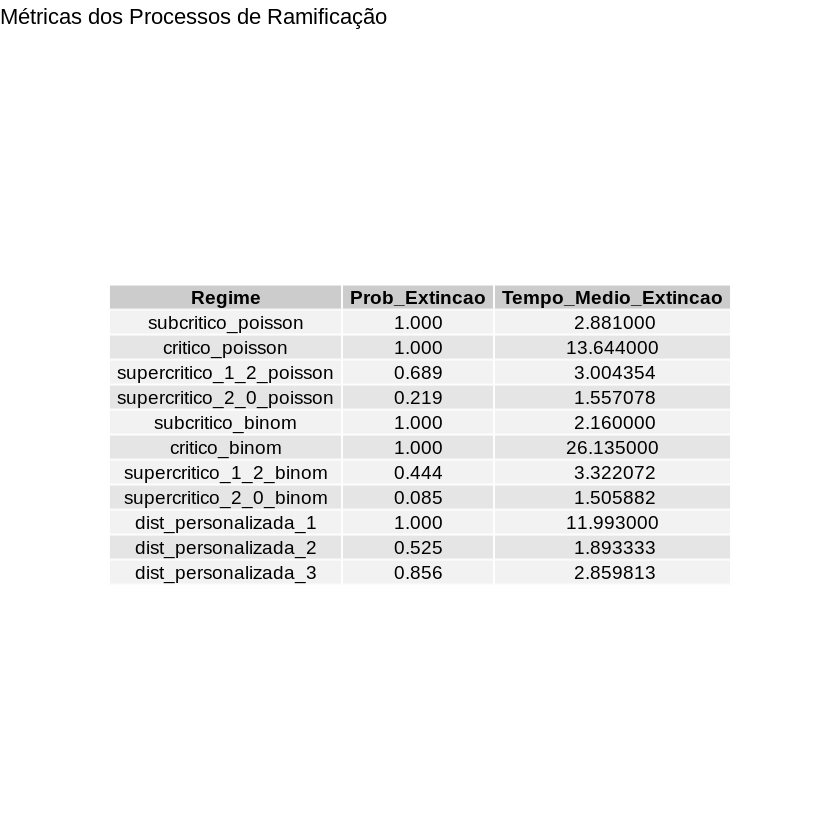

In [9]:
library(ggpmisc)
tabela_dados_de_interesse <- ggplot() +
  geom_table(
    data = metricas,
    aes(x = 0, y = 0, label = list(metricas)),
    size = 4
  ) +
  theme_void() +
  ggtitle("Métricas dos Processos de Ramificação")
tabela_dados_de_interesse

**Gráfico 1: que mostra as frequências relativas vulgo as probabilidades de extinção por regime estabelecido**

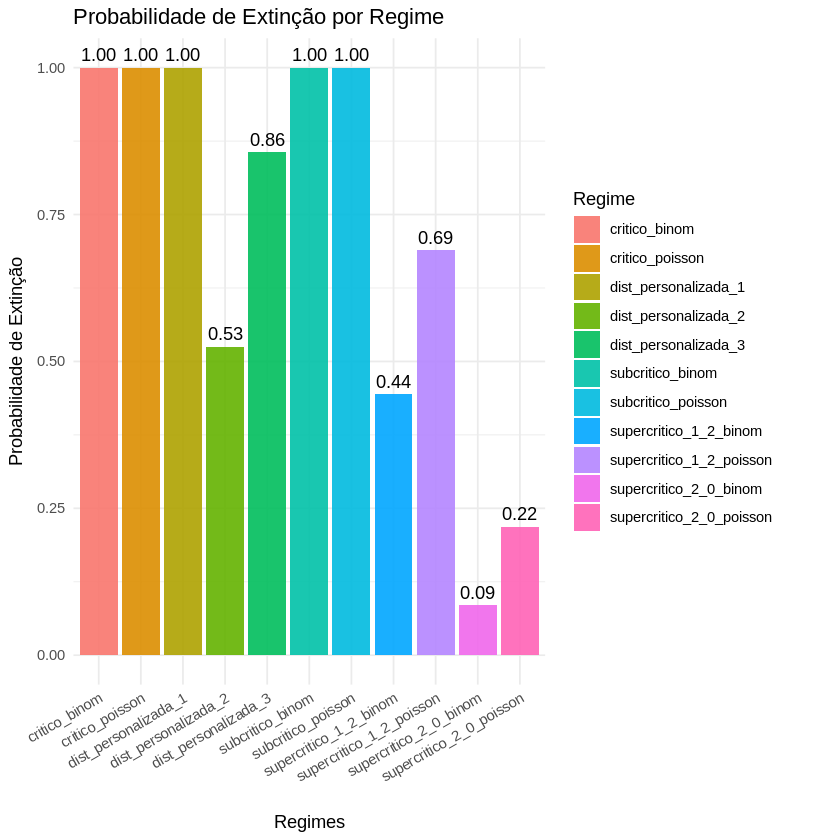

In [7]:
plot_01 <- ggplot(metricas, aes(x = Regime, y = Prob_Extincao, fill = Regime)) +
  geom_col(alpha = 0.9) + #transparência nas barras
  geom_text(aes(label = sprintf("%.2f", Prob_Extincao)), vjust = -0.5) +
  labs(title = "Probabilidade de Extinção por Regime",
       x = "Regimes",
       y = "Probabilidade de Extinção") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 30, hjust = 1))
plot_01

**Gráfico 2: que mostra as médios de tempo de extinção por regime estabelecido, considerando apenas processos**


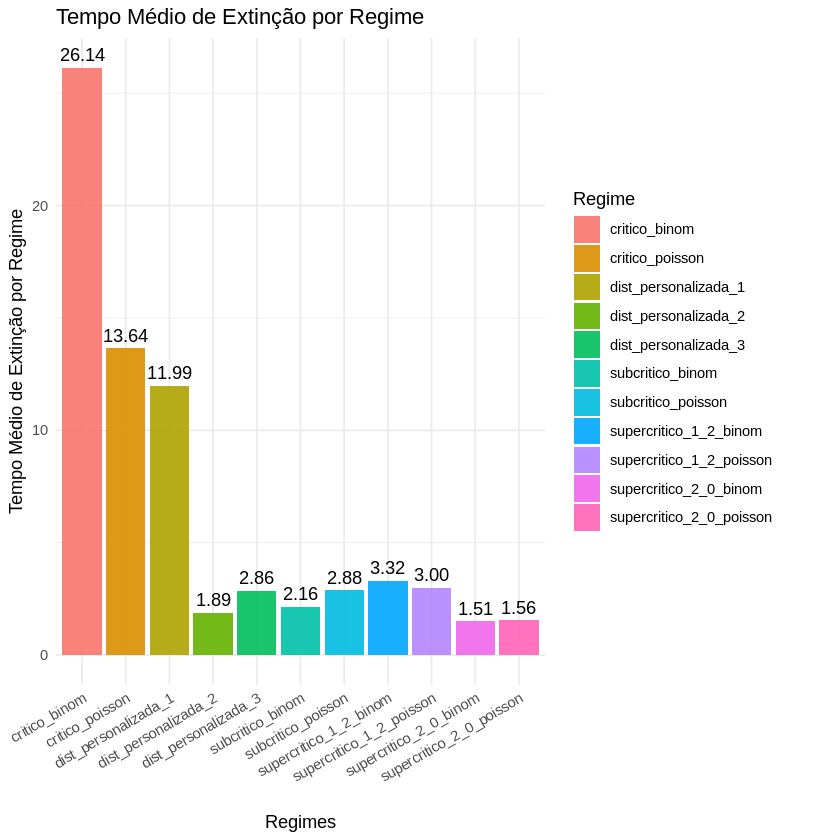

In [8]:
plot_02 <- ggplot(metricas, aes(x = Regime, y = tempo_medio_extincao, fill = Regime)) +
  geom_col(alpha = 0.9) +
  geom_text(aes(label = sprintf("%.2f", tempo_medio_extincao)), vjust = -0.5) +
  labs(title = "Tempo Médio de Extinção por Regime",
       x = "Regimes",
       y = "Tempo Médio de Extinção por Regime") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 30, hjust = 1))
plot_02

**Gráfico 3: que mostra a distribuição do tempo de extinção para cada regime (apenas para as extintas)**


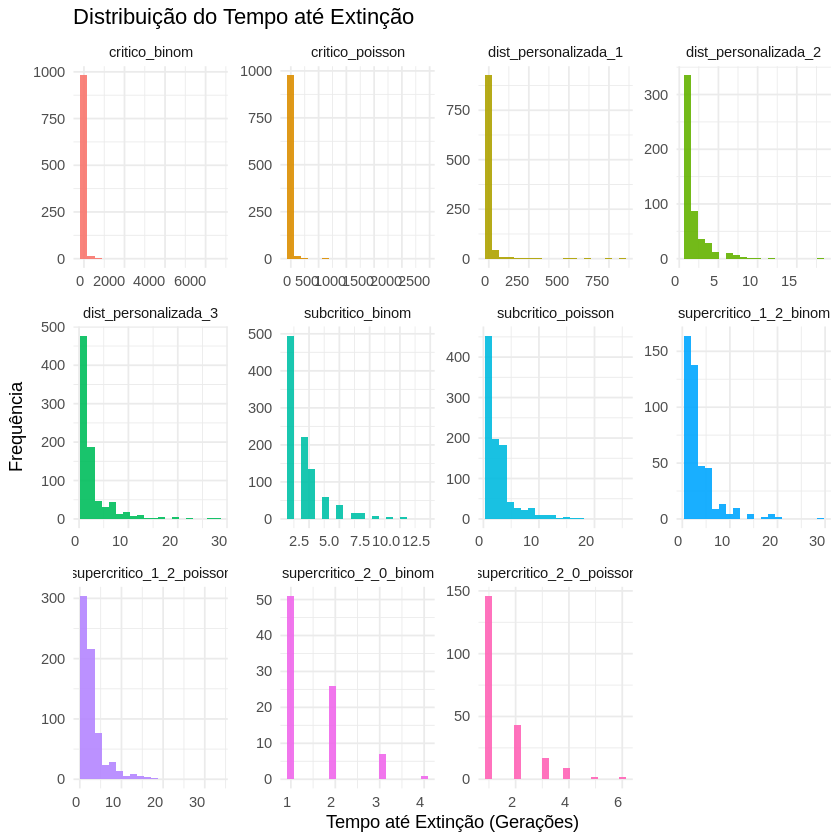

In [10]:
plot_03 <- ggplot(dados_tempos, aes(x = Tempo_Extincao, fill = Regime)) +
  geom_histogram(alpha = 0.9, bins = 20) +
  facet_wrap(~Regime, scales = "free") +
  labs(title = "Distribuição do Tempo até Extinção",
       x = "Tempo até Extinção (Gerações)",
       y = "Frequência") +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 1))
print(plot_03)

As trajetórias dos processos:

In [14]:
library(data.table)
#uma lista de gráficos das trajetórias dos processos:
trajetorias <- list()

for (nome in names(regimes)) {
  historias <- resultados_simulacoes[[nome]]$historias
  n_trajetorias <- min(100, length(historias))
  max_tamanho <- max(sapply(historias[1:n_trajetorias], length))

  # Converter a lista para data.table no formato adequado
  data <- rbindlist(

    lapply(1:n_trajetorias, function(i) {
      trajetoria <- historias[[i]]
  # se o processo extinguiu, estender a trajetória com zeros até max_length
  if (resultados_simulacoes[[nome]]$df$Extincao[i]) {
    trajetoria_completa <- c(trajetoria, rep(0, max_tamanho - length(trajetoria)))
  }
  # se não extinguiu, preencher com NA
  else {
    trajetoria_completa <- c(trajetoria, rep(NA, max_tamanho - length(trajetoria)))
  }
  data.table(
    t = 1:max_tamanho,
    value = trajetoria_completa,
    variable = paste0("sim", i)
      )
    })

  )
  # criar os gráficos (usando código desse blog: https://bookdown.org/probability/bookdown-demo/branching-processes.html)
  trajetorias[[nome]] <- ggplot(data, aes(x = t, y = value, col = variable)) +
    geom_line(alpha = 0.6) +
    theme_bw() +
    theme(legend.position = "none") +
    ggtitle(paste("Processo de Ramificação - ", nome)) +
    xlab("Tempo") +
    ylab("Tamanho da população no tempo i (Z_i)")
}


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




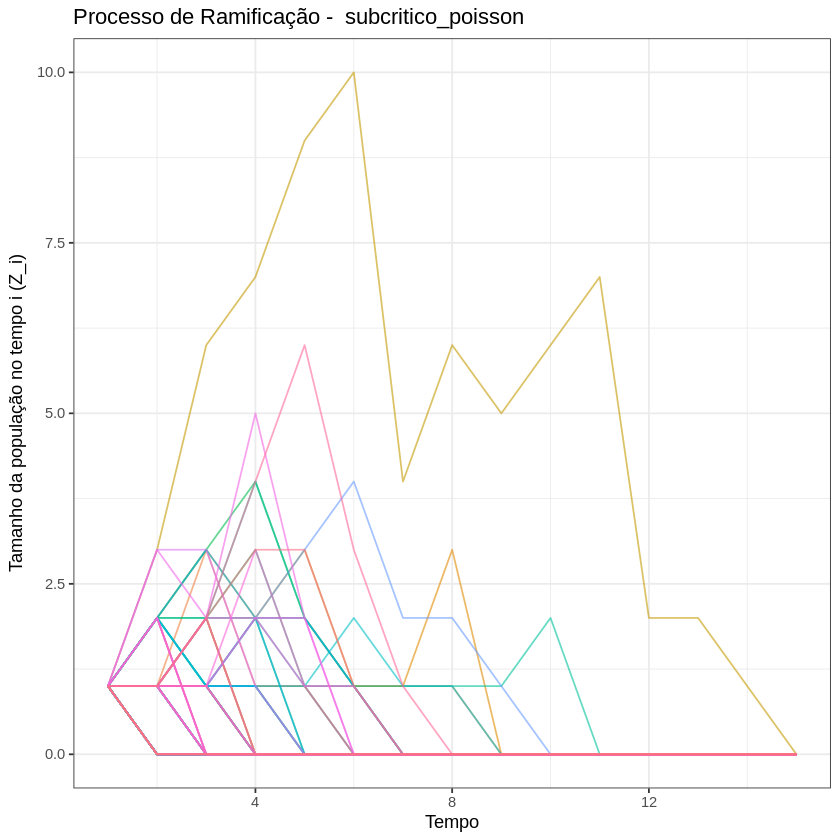

In [15]:
print(trajetorias[["subcritico_poisson"]])

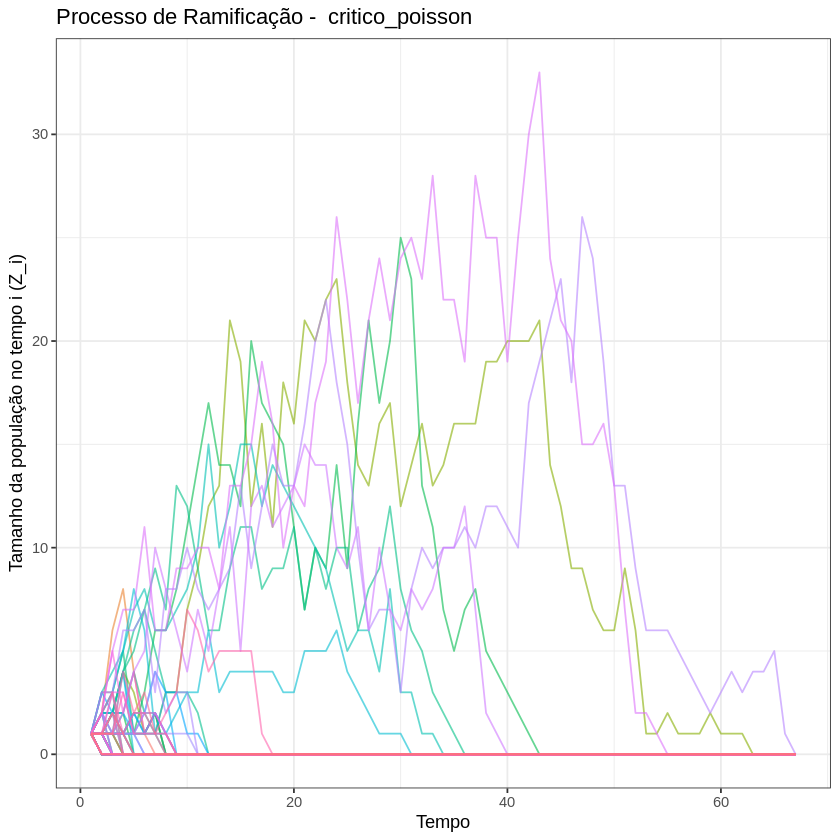

In [16]:
print(trajetorias[["critico_poisson"]])

Warning message:
“Removed 537 rows containing missing values or values outside the scale range
(`geom_line()`).”


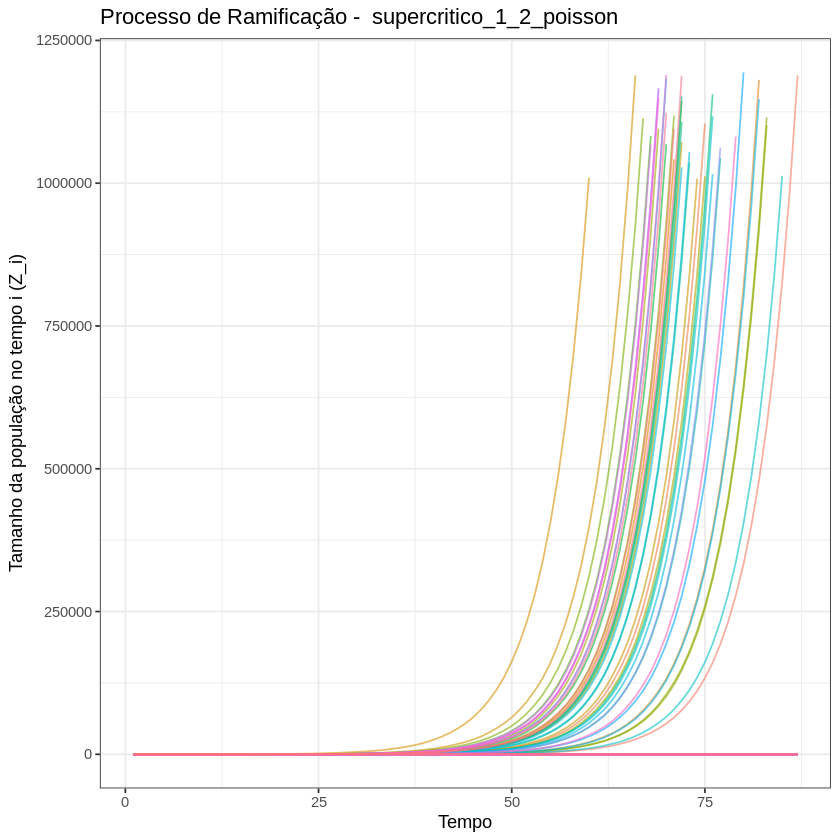

In [17]:
print(trajetorias[["supercritico_1_2_poisson"]])

Warning message:
“Removed 357 rows containing missing values or values outside the scale range
(`geom_line()`).”


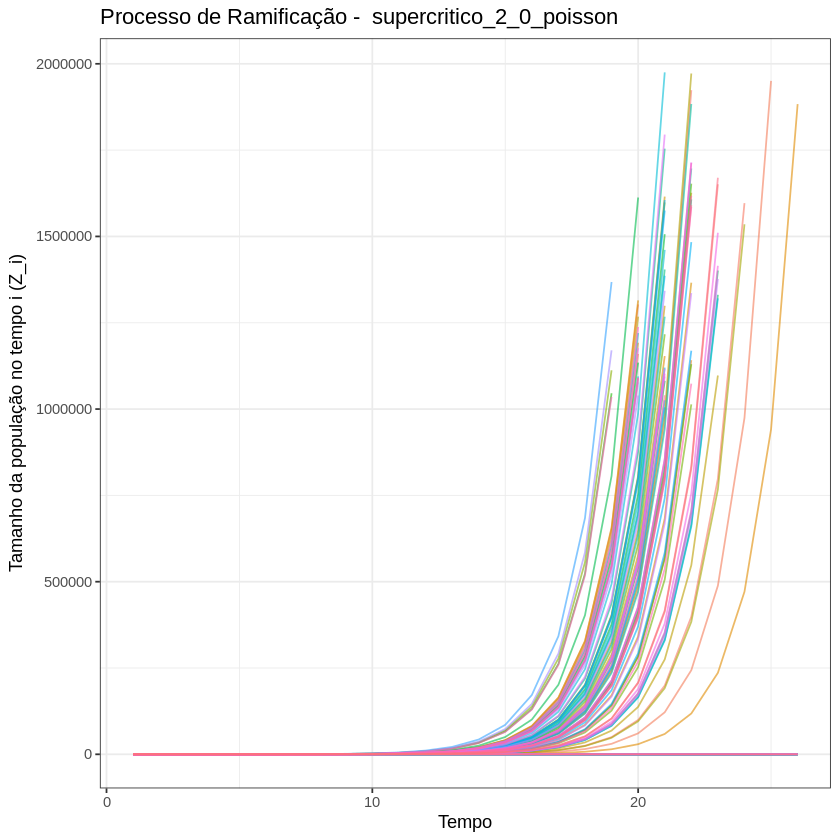

In [18]:
print(trajetorias[["supercritico_2_0_poisson"]])

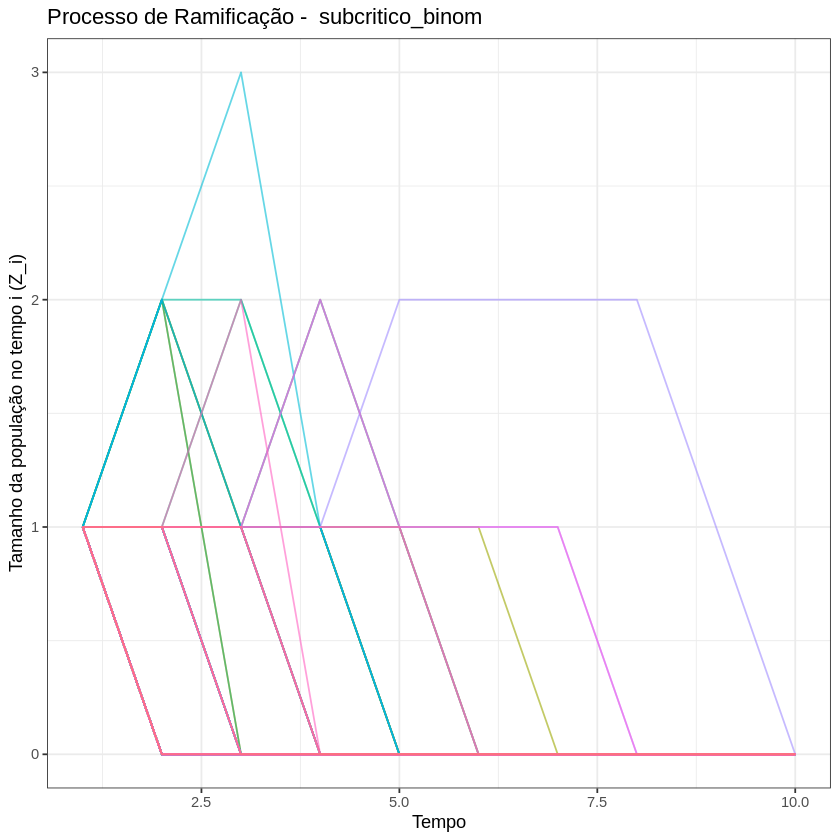

In [19]:
print(trajetorias[["subcritico_binom"]])

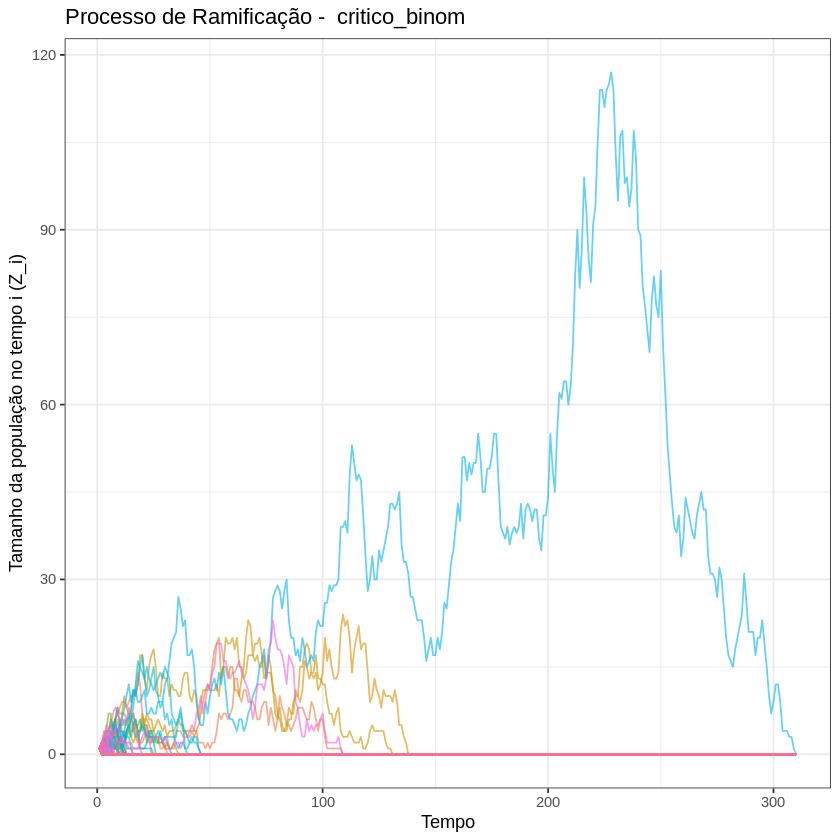

In [20]:
print(trajetorias[["critico_binom"]])

Warning message:
“Removed 891 rows containing missing values or values outside the scale range
(`geom_line()`).”


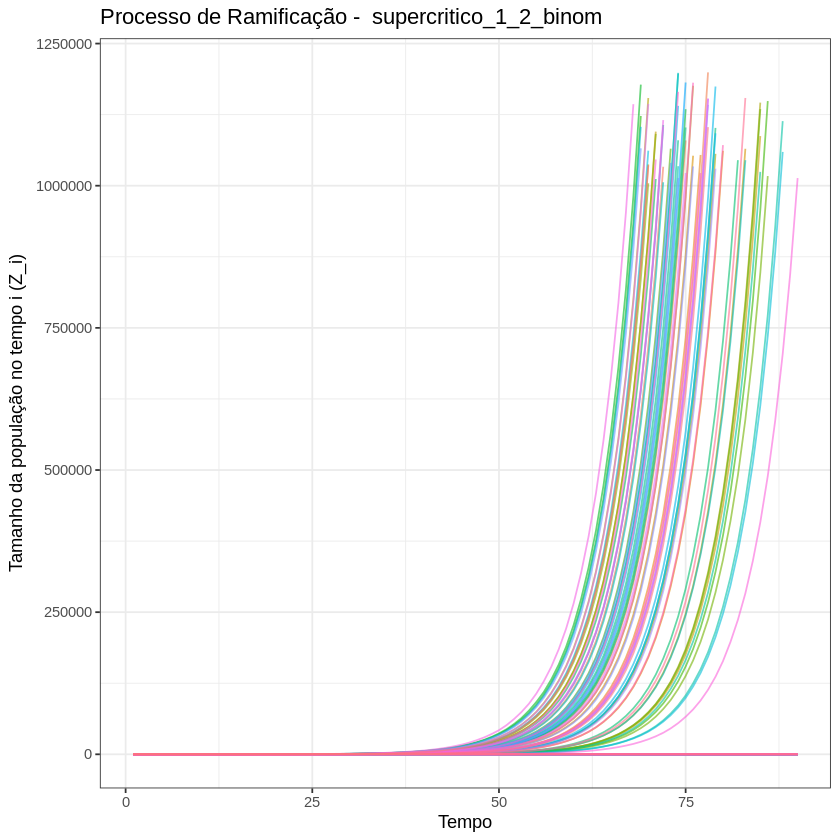

In [21]:
print(trajetorias[["supercritico_1_2_binom"]])

Warning message:
“Removed 502 rows containing missing values or values outside the scale range
(`geom_line()`).”


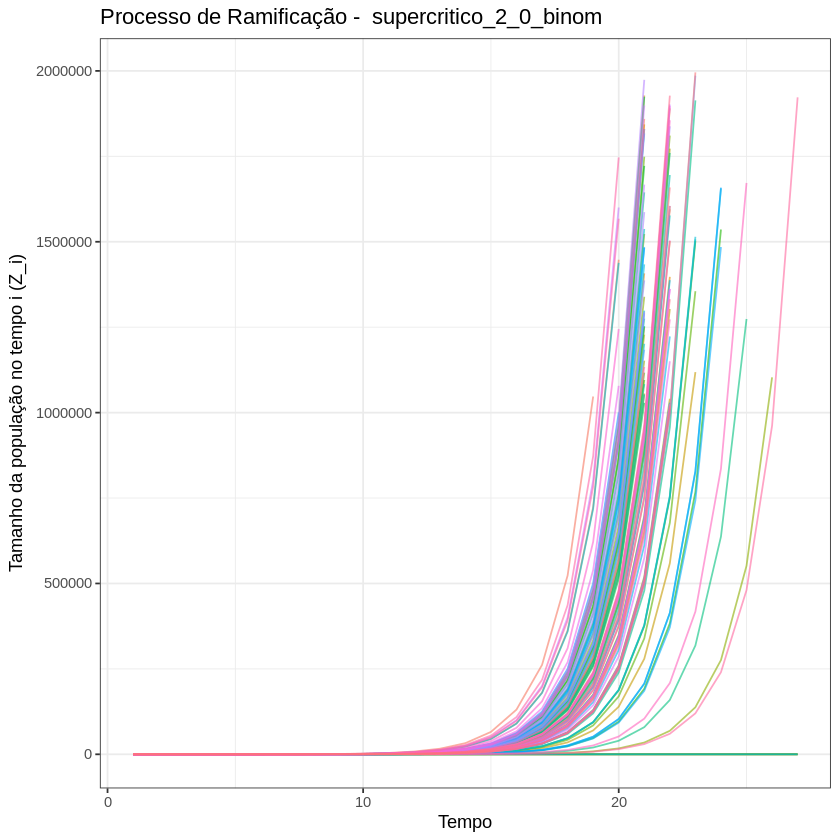

In [22]:
print(trajetorias[["supercritico_2_0_binom"]])

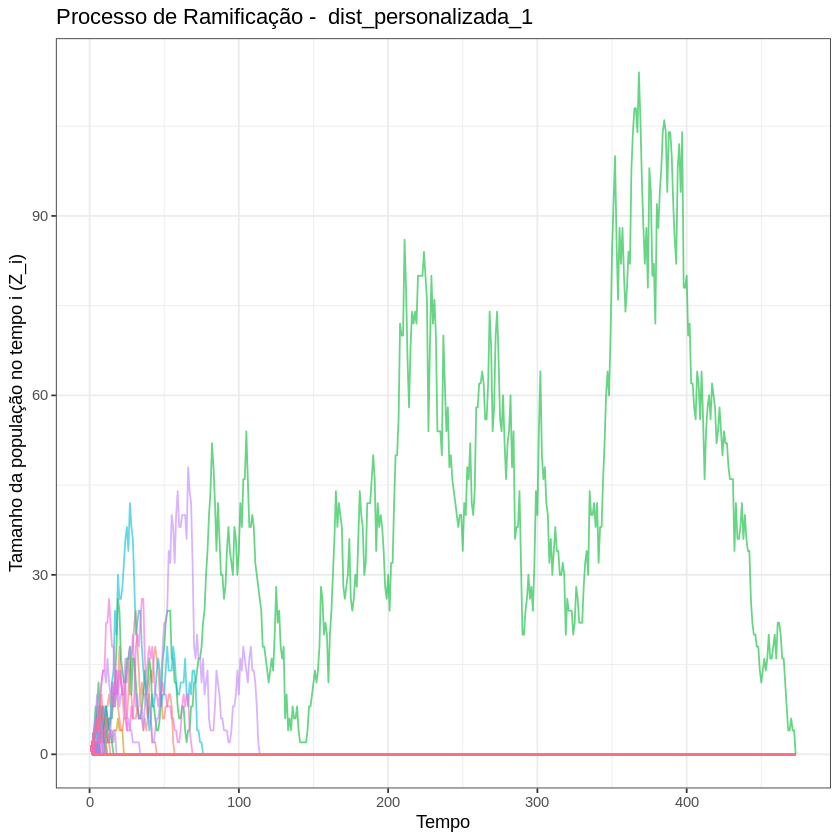

In [23]:
print(trajetorias[["dist_personalizada_1"]])

Warning message:
“Removed 714 rows containing missing values or values outside the scale range
(`geom_line()`).”


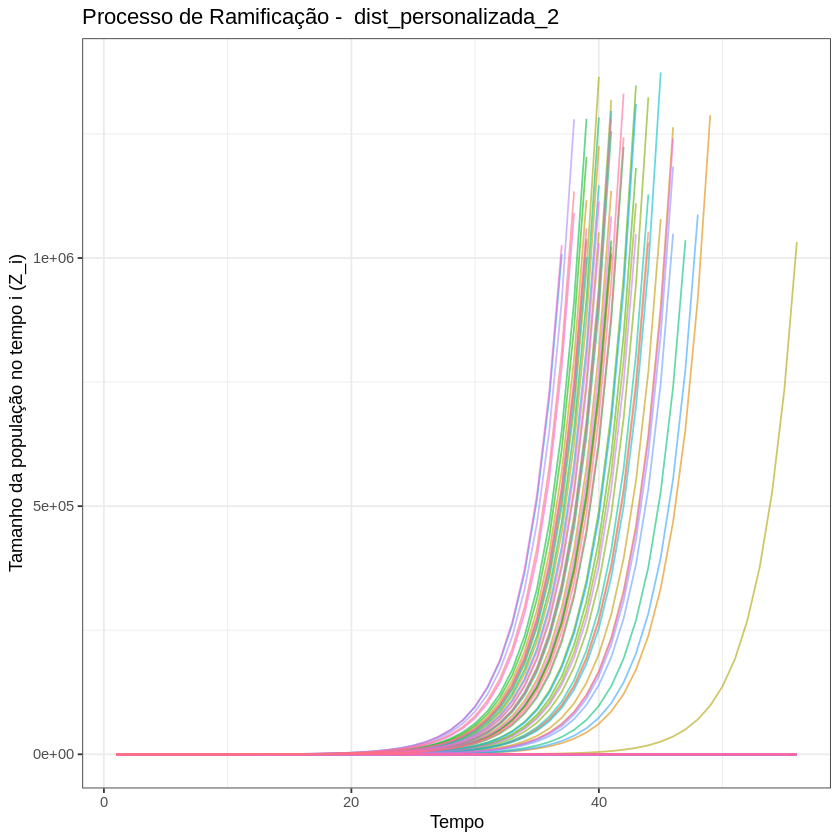

In [24]:
print(trajetorias[["dist_personalizada_2"]])

Warning message:
“Removed 250 rows containing missing values or values outside the scale range
(`geom_line()`).”


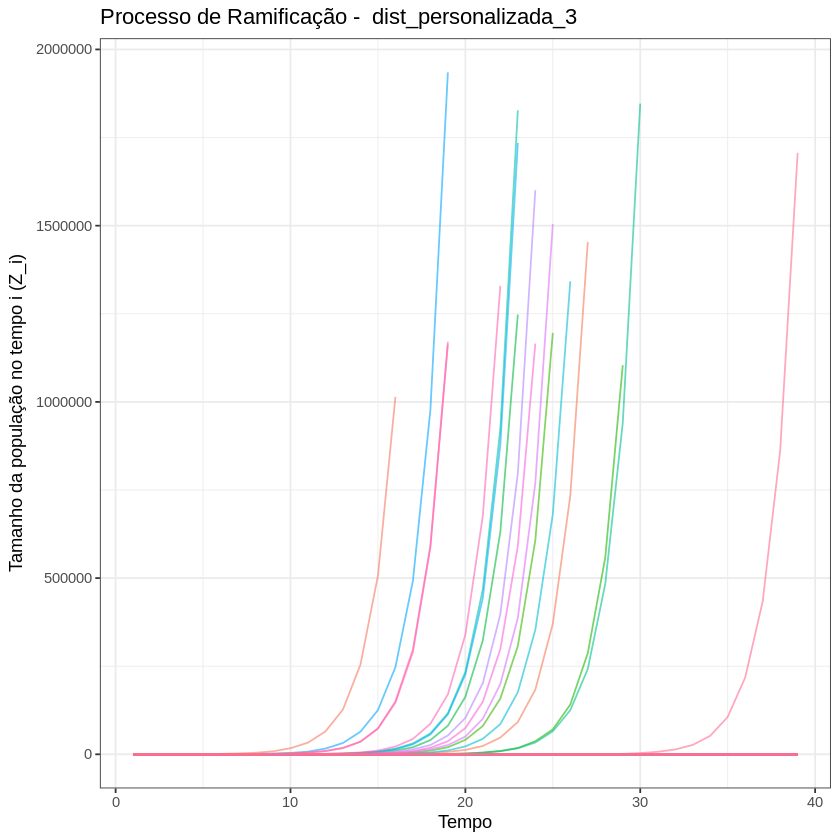

In [25]:
print(trajetorias[["dist_personalizada_3"]])

In [ ]:
#Lara Fernandes Andreu Guillo
#Marcelo Xinhong Huang

G0 <- 1
distribuicao <- "poisson"
parametro1 <- 3
parametro2 <- 8


frequencia_extincao <- FALSE

processo_de_ramificacao <- function(dist = distribuicao, p1 = parametro1 , p2 = parametro2){
  Z <- numeric
  Z[1] <- G0
  tempo_extincao <- 0
  for (k in 1:algo){
    if (Z[k]== 0){
      tempo_extincao <- k
      frequencia_extincao <- TRUE
      break
    }
    if (Z[k]>0){
      if (dist = "poisson"){
        descendentes <- rpois(Z[k], p1)
  }
      if (dist = "binomial"){
        descendentes <- rbinom(Z[k], prob = p1, size = p2)
  }
      else{
        break ##nn sei kkkk
  }

  Z[k+1]<- algo
    }
  }
}
  tempo_extincao <- 0

set.seed(123)

regime <- function(processo_de_ramificacao(coisos aqui dentro, e isso ta errado bem provavelmente), M = 10000){

}